<a href="https://colab.research.google.com/github/reginaldofdias/data_science_na_pratica/blob/master/Analisando_os_Dados_do_Airbnb_Madri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/reginaldofdias/data_science_na_pratica/master/img/aibnb-madri.jpg">

*by Reginaldo Florêncio Dias*

---

# Análise dos Dados do Airbnb - *Madri*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Madri, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Madri (good for visualisations).*

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-05-14/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entedimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.61,1,90
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.48,2,0
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,7,365
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.62,1,1
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,149,2020-03-12,1.22,1,332


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [9]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 21739
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender desde o inicio o quanto esses valores nulos são significativos ao todal de entradas.


In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

reviews_per_month                 23.29914
last_review                       23.29914
host_name                          0.01380
name                               0.01380
availability_365                   0.00000
calculated_host_listings_count     0.00000
number_of_reviews                  0.00000
minimum_nights                     0.00000
price                              0.00000
room_type                          0.00000
longitude                          0.00000
latitude                           0.00000
neighbourhood                      0.00000
neighbourhood_group                0.00000
host_id                            0.00000
id                                 0.00000
dtype: float64

* As variáveis 'reviews_per_month' e 'last_review possuem valores nulos em 23%;
* As 'host_name' e 'name' possuem 0,01% de valores nulos.


### **Q3. Qual o tipo de distribuição das variáveis?**

Vamos plotar o histograma, para verificar as distribuição das variáveis.

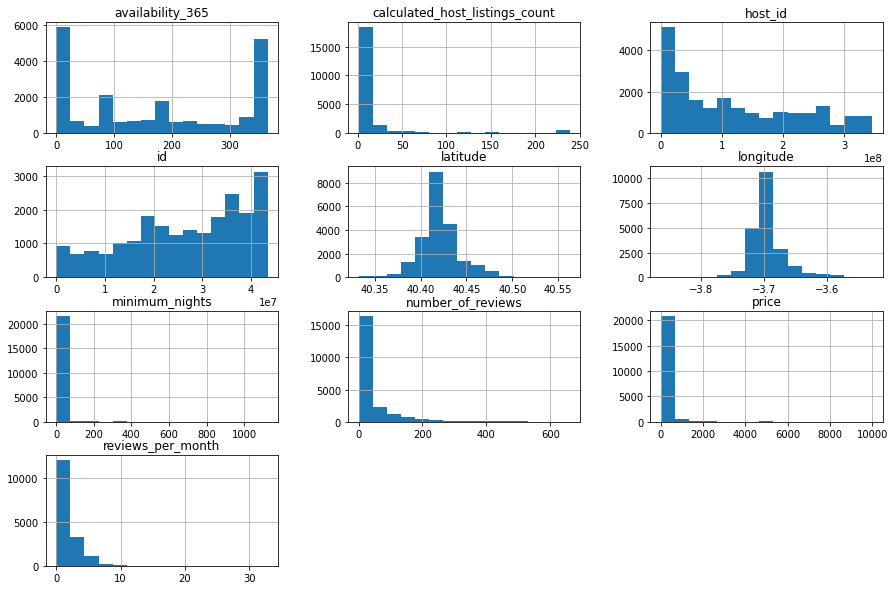

In [11]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Conforme mostra a distribuição do historgrama, é possivel identificar indícios da presença de *outliers*. As variáveis price, minimum_nigths e calculated_host_listings_count, number_of_reviews. 

Os valores não seguem uma distribuiçãi, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outileirs*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots`para a variável



In [12]:
# veros resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21739.000000,21739.000000,21739.000000,16674.000000,21739.000000,21739.000000
mean,165.105387,5.312894,36.998298,1.630527,14.638070,170.737338
std,554.708399,25.299401,66.826552,1.733532,39.763124,141.622838
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,39.000000,1.000000,1.000000,0.340000,1.000000,5.000000
50%,64.000000,2.000000,8.000000,1.000000,2.000000,166.000000
75%,100.000000,3.000000,42.000000,2.420000,7.000000,335.000000
max,9999.000000,1125.000000,661.000000,32.840000,239.000000,365.000000



Analisando a variável `price`, é possível verificar uma dispersão no valor de preço máximo, que chega a ser 9999 euros e no preço mínimo 0 euros, enquanto 75% dos valores estão abaixo de 100 euros. Há também uma dispersão nos valores de noites mínimas(`minimum_nights`) que chega a ultrapassar 1125 noites.

###Removendo Outliers
Vamos utilizar um boxplot para as colunas `price` e `minimum_nigths` para verificar suas distribuições.

Também verificaremos qual a porcentagem da variável `price` 0 e maior do que 300 euros, e a porcentagem para a variável `minimum_nights` maior do que 30 noites.

##### Boxplot para price


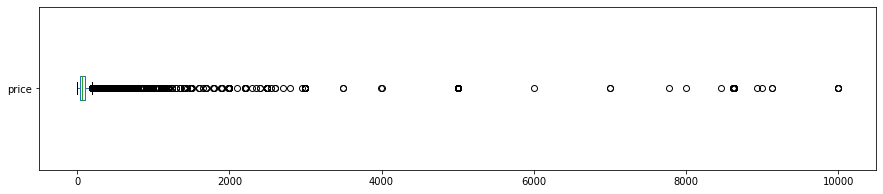


price: valores igual a 0
1 entradas
0.0046%

price: valores acima de 300
1510 entradas
6.9460%


In [17]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidadde de valores igual a 0
print("\nprice: valores igual a 0")
print("{} entradas".format(len(df[df.price == 0])))
print("{:.4f}%".format((len(df[df.price == 0]) / df.shape[0])*100))

# ver quantidadde de valores acima de 300 para price
print("\nprice: valores acima de 300")
print("{} entradas".format(len(df[df.price > 300])))
print("{:.4f}%".format((len(df[df.price > 300]) / df.shape[0])*100))

#### Boxplot para minimum_nights


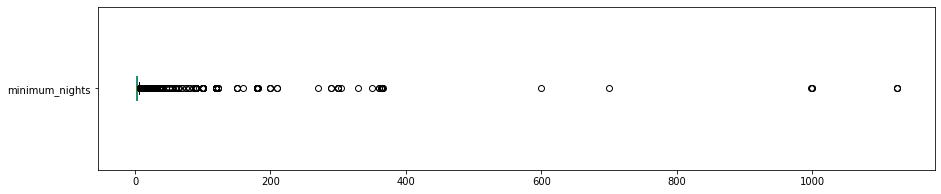

minimum_nights: valores acima de 30:
255 entradas
1.1730%


In [18]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))




#### Histogramas sem *outliers*
Já que identificamos *outliers* nas variáveis de interesse `price` e `minimum_nights`, vamos remover os *outliers* do  DataFrame e plotar novamente o histograma. 

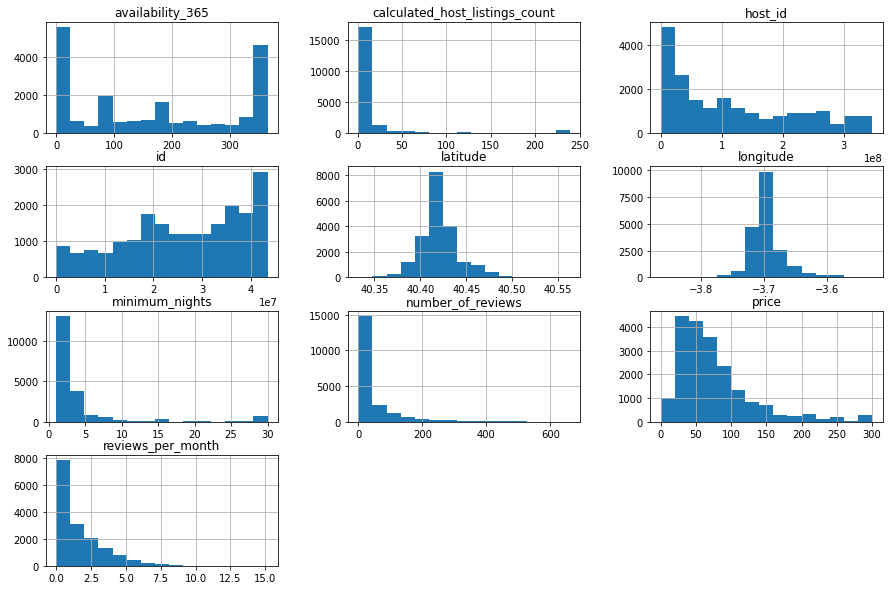

In [19]:
# remover os outliers para criar um novo DataFrame limpo
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numérica
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**.
Vamos calcular a média da coluna preço através da função mean() e ordená-la em ordem descrescente

In [20]:
# ver a média da coluna `price``por neighbourdhood_group
df_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

neighbourhood_group
Salamanca                87.015873
Centro                   82.108178
Chamartín                80.645038
Moncloa - Aravaca        76.750000
San Blas - Canillejas    75.695187
Retiro                   75.446809
Chamberí                 74.563301
Vicálvaro                71.830189
Hortaleza                71.014837
Tetuán                   65.696711
Fuencarral - El Pardo    62.946619
Arganzuela               61.791150
Barajas                  61.591195
Villa de Vallecas        58.633333
Carabanchel              54.995536
Ciudad Lineal            54.723642
Latina                   47.101449
Moratalaz                46.637168
Usera                    44.707143
Puente de Vallecas       42.839258
Villaverde               39.680723
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual intensidade dela. Para identificar as correlações existentes entre as variáves de interesse seguiremos os seguintes passos:
* Criar uma matriz de correlação;
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn


In [21]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.003551,-0.041380,-0.015531,0.060213,0.079389
minimum_nights,-0.003551,1.000000,-0.096263,-0.115429,0.294388,0.121831
number_of_reviews,-0.041380,-0.096263,1.000000,0.771166,-0.078664,0.070420
reviews_per_month,-0.015531,-0.115429,0.771166,1.000000,-0.068669,0.062015
calculated_host_listings_count,0.060213,0.294388,-0.078664,-0.068669,1.000000,0.136919
availability_365,0.079389,0.121831,0.070420,0.062015,0.136919,1.000000


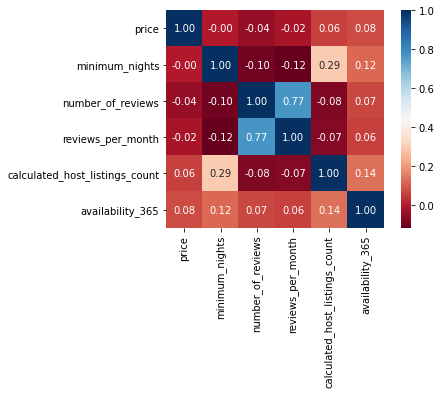

In [22]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Aparetemente as variáveis não parecem estar significativamente correlacionadas entre si.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Através da análise da coluna room_type que indica o tipo de locação (apartamentos/casas, aluguel de um quarto ou mesmo dividr quanto como outas pessoas) disponível no site para alugar, podemos fazer uma contagem de cada tipo disponível.

In [23]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12261
Private room        7252
Shared room          296
Hotel room           171
Name: room_type, dtype: int64

In [25]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    61.366366
Private room       36.296296
Shared room         1.481481
Hotel room          0.855856
Name: room_type, dtype: float64

In [99]:
# Calculando a média de preco por tipo de quarto
df_clean.groupby('room_type').price.mean().sort_values(ascending=False)


tipos de quartos room_type
Entire home/apt    90.697496
Hotel room         90.561404
Private room       45.969112
Shared room        35.679054
Name: price, dtype: float64


### **Q6. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). Aqui podemos comparar os bairros (neighbourhoods) ou região (neighbourhoods_group) a partir do preco de loçação.  


In [95]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10]

neighbourhood
Recoletos       106.025362
Castellana      105.606936
Jerónimos       102.778947
Palomas         102.764706
El Viso         102.452055
Canillejas       99.547170
Sol              94.060967
Niño Jesús       93.630435
Hellín           92.800000
Nueva España     92.476190
Name: price, dtype: float64

In [ ]:
# ver preços por região, na média
df_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

neighbourhood_group
Salamanca                87.015873
Centro                   82.108178
Chamartín                80.645038
Moncloa - Aravaca        76.750000
San Blas - Canillejas    75.695187
Retiro                   75.446809
Chamberí                 74.563301
Vicálvaro                71.830189
Hortaleza                71.014837
Tetuán                   65.696711
Fuencarral - El Pardo    62.946619
Arganzuela               61.791150
Barajas                  61.591195
Villa de Vallecas        58.633333
Carabanchel              54.995536
Ciudad Lineal            54.723642
Latina                   47.101449
Moratalaz                46.637168
Usera                    44.707143
Puente de Vallecas       42.839258
Villaverde               39.680723
Name: price, dtype: float64

Pelas latitudes e Longitude fornecidadas no dataset, é possivel plotar os pontos. Para isso, consideramos x= longitude e y=latitude.

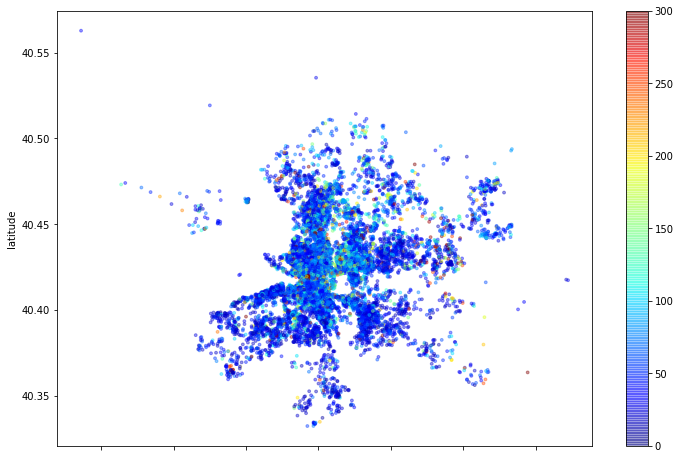

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Para verificar a média de preço dos alugueis será gerado novamente uma tabela de resumo estatístico da variável minumum_nights, com os dados tratados.

In [37]:
# tabela de resumo estatístico da coluna `minimum_nights`
df_clean[['minimum_nights']].describe()



,minimum_nights
count,19980.000000
mean,3.753954
std,6.073892
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,30.000000


In [31]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

3.753953953953954

## Conclusões


Durante o projeto, realizamos algumas análises interessantes dos dados do Airbnb da cidade de Madri e conseguimos responder a algumas perguntas, como:

Que tipo de quarto é mais comum?
Qual é a diferença de preço entre os diferentes tipos de quartos?
Quais são as regiões mais caras e mais baratas para ficar em Madri?

Para atingir esses objetivos, passamos por importantes etapas de manipulação de dados, como explorar, limpar, analisar e visualizar dados.

Após todas essa estapas, as conclusões são:

* Salas privadas e apartamentos inteiros são os tipos de quartos mais alugados;
* Quartos de hotel e apartamentos inteiros geralmente são mais caros que quartos
privativos e compartilhados;
* As regiões mais caras são Salamanca, Centro e Chamartín e as mais baratas são Usera, Puente de Vallecas e Villaverde.

Lembrando, que esse é um dataset resumido, para uma análise mais profunda é possível utilizar o dataset com 106 atributos disponibilizado pela Airbnb.